# Simulation Modeling

## Download Data
#### Download S&P 500 index data from Yahoo Finance

In [31]:
import pandas as pd
import pandas.io.data as web
import matplotlib.pyplot as plt
import datetime as datetime
from numpy import *
%matplotlib inline

Set start date, end date and data source ('Yahoo Finance', 'Google Finance', etc.). Download S&P 500 index data from Yahoo Finance.

In [8]:
start_date = datetime.date(1976,1,1)
end_date = datetime.date(2015,1,1)
# Download S&P 500 index data
SnP500_Ddata = web.DataReader('^GSPC','yahoo',start_date,end_date)
SnP500_Ddata.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1976-01-02,90.190002,91.180000,89.809998,90.900002,10300000,90.900002
1976-01-05,90.900002,92.839996,90.849998,92.580002,21960000,92.580002
1976-01-06,92.580002,94.180000,92.370003,93.529999,31270000,93.529999
1976-01-07,93.529999,95.150002,92.910004,93.949997,33170000,93.949997
1976-01-08,93.949997,95.470001,93.410004,94.580002,29030000,94.580002


#### Transform daily data into annual data:

In [9]:
# Create a time-series of annual data points from daily data
SnP500_Adata = SnP500_Ddata.resample('A',how='last')
SnP500_Adata[['Volume','Adj Close']].tail()

,Volume,Adj Close
Date,,
2010-12-31,1799770000,1257.640015
2011-12-31,2271850000,1257.599976
2012-12-31,3204330000,1426.189941
2013-12-31,2312840000,1848.359985
2014-12-31,2606070000,2058.899902


#### Compute annual return of S&P 500 index:

In [10]:
SnP500_Adata['returns'] = SnP500_Adata['Adj Close'] / SnP500_Adata['Adj Close'].shift(1) -1
SnP500_Adata = SnP500_Adata.dropna()
print SnP500_Adata['returns']

Date
1977-12-31   -0.115020
1978-12-31    0.010620
1979-12-31    0.123088
1980-12-31    0.257736
1981-12-31   -0.097304
1982-12-31    0.147613
1983-12-31    0.172710
1984-12-31    0.014006
1985-12-31    0.263334
1986-12-31    0.146204
1987-12-31    0.020275
1988-12-31    0.124008
1989-12-31    0.272505
1990-12-31   -0.065591
1991-12-31    0.263067
1992-12-31    0.044643
1993-12-31    0.070552
1994-12-31   -0.015393
1995-12-31    0.341107
1996-12-31    0.202637
1997-12-31    0.310082
1998-12-31    0.266686
1999-12-31    0.195260
2000-12-31   -0.101392
2001-12-31   -0.130427
2002-12-31   -0.233660
2003-12-31    0.263804
2004-12-31    0.089935
2005-12-31    0.030010
2006-12-31    0.136194
2007-12-31    0.035296
2008-12-31   -0.384858
2009-12-31    0.234542
2010-12-31    0.127827
2011-12-31   -0.000032
2012-12-31    0.134057
2013-12-31    0.296012
2014-12-31    0.113906
Freq: A-DEC, Name: returns, dtype: float64


#### Compute average annual return and standard deviation of return for S&P 500 index:

In [11]:
SnP500_mean_ret = float(SnP500_Adata[['returns']].mean())
SnP500_std_ret = float(SnP500_Adata[['returns']].std())
print ("S&P 500 average return = %g%%, st. dev  = %g%%") % (100*SnP500_mean_ret, 100*SnP500_std_ret)

S&P 500 average return = 9.37905%, st. dev  = 16.1457%


## Simulation Example 1

We want to invest \$1000 in the US stock market for 1 year: $v_0 = 1000$

In [12]:
v0 = 1000 # Initial capital

In our example we assume that the return of the market over the next year follow Normal distribution.

Between 1977 and 2014, S&P 500 returned 9.38% per year on average with a standard deviation of 16.15%.

Generate 100 scenarios for the market return over the next year (draw 100 random numbers from a Normal distribution with mean 9.38% and standard deviation of 16.15%):

In [13]:
Ns = 100 # Number of scenarios
r01 = random.normal(SnP500_mean_ret, SnP500_std_ret, Ns)
r01

array([ 0.35598495, -0.08728545, -0.06538798, -0.17728624,  0.05076426,
        0.11670968, -0.1044097 , -0.06619878,  0.12534834,  0.15082653,
       -0.05478455,  0.24574875, -0.12997045,  0.11929253,  0.24360746,
       -0.02103356, -0.08901738,  0.08696183,  0.10398831, -0.02884073,
        0.02906176, -0.00831827,  0.27880729,  0.11035727,  0.27899114,
        0.13512768,  0.21280517,  0.20580367, -0.16334227, -0.08223712,
        0.08780305,  0.10560988,  0.13082189,  0.15861429,  0.18243336,
       -0.01976181,  0.0518272 , -0.17655103,  0.08517636,  0.30401511,
        0.41719346, -0.296872  , -0.04658693, -0.16611723,  0.1007858 ,
       -0.03156323, -0.12440063,  0.12795465,  0.11044304, -0.29392062,
       -0.04493717,  0.1479331 , -0.18323641,  0.3026894 , -0.09791451,
       -0.03349481,  0.2689458 ,  0.21983049, -0.00351406,  0.00651652,
        0.08591126,  0.03700078,  0.20884204,  0.00964793,  0.1398938 ,
       -0.03257619, -0.0999095 ,  0.0846976 ,  0.11919848, -0.17

Value of investment at the end of year 1:
$v_1 = v_0 + r_{0,1}\cdot v_0 = (1 + r_{0,1})\cdot v_0$

In [14]:
# Distribution of value at the end of year 1
v1 = (r01 + 1) * v0
v1

array([ 1355.98494515,   912.71454681,   934.61201802,   822.71376441,
        1050.76426131,  1116.70967606,   895.59029908,   933.80121887,
        1125.34834366,  1150.82652937,   945.2154453 ,  1245.74874567,
         870.02955286,  1119.29252951,  1243.60746227,   978.96644403,
         910.98262199,  1086.96182816,  1103.9883135 ,   971.15927412,
        1029.06175997,   991.68173176,  1278.80729189,  1110.35727088,
        1278.99114262,  1135.12767931,  1212.80517498,  1205.80367197,
         836.65772926,   917.7628755 ,  1087.80304748,  1105.60987669,
        1130.82188903,  1158.61429225,  1182.43336005,   980.23819437,
        1051.8272048 ,   823.44896549,  1085.17635901,  1304.01511094,
        1417.19346131,   703.12799872,   953.41307211,   833.88276626,
        1100.78579937,   968.43677468,   875.5993744 ,  1127.95464683,
        1110.44303719,   706.07937764,   955.06282825,  1147.93309983,
         816.76358978,  1302.68939801,   902.08549088,   966.50519478,
      

Mean:

In [15]:
mean(v1)

1063.8394686832085

Standard deviation: 

In [16]:
std(v1)

172.0113294597862

Minimum, maximum: 

In [17]:
min(v1), max(v1)

(625.38816158919394, 1495.4723910382922)

Persentiles

5th percentile, median, 95th percentile:

In [18]:
percentile(v1, [5, 50,95])

[815.05031242056657, 1084.9369795130842, 1334.5089316573017]

Alternative way to compute percentiles

5th percentile, median, 95th percentile:

In [19]:
sortedScen = sorted(v1)   # Sort scenarios
sortedScen[5-1], sortedScen[50-1], sortedScen[95-1]

(782.49804254196101, 1084.6976000172924, 1333.3786151574377)

Plot a histogram of the distribution of outcomes for v1:

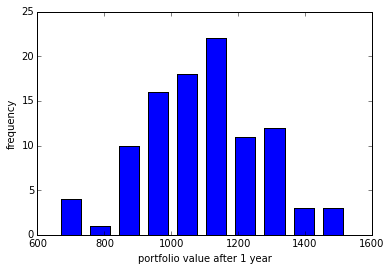

In [20]:
hist, bins = histogram(v1)
positions = (bins[:-1] + bins[1:]) / 2
plt.bar(positions, hist, width=60)
plt.xlabel('portfolio value after 1 year')
plt.ylabel('frequency')
plt.show()

Simulated paths over time:

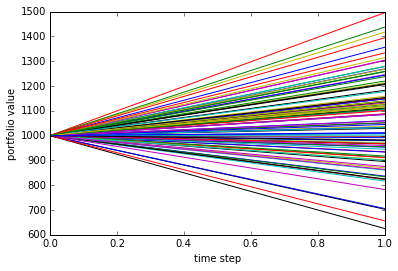

In [21]:
# Plot simulated paths over time
for res in v1:
    plt.plot((0,1), (v0, res))
plt.xlabel('time step')
plt.ylabel('portfolio value')
plt.show()

# Simulation Example 2

You are planning for retirement and decide to invest in the market for the next 30 years (instead of only the next year as in example 1).

Assume that every year your investment returns from investing into the        S&P 500 will follow a Normal distribution with the mean and standard deviation as in example 1.

Your initial capital is still \$1000

In [22]:
v0 = 1000 # Initial capital

Between 1977 and 2014, S&P 500 returned 9.38% per year on average with a standard deviation of 16.15%
Simulate 30 columns of 100 observations each of single period returns:

In [23]:
r_speriod30  = random.normal(SnP500_mean_ret, SnP500_std_ret, (Ns, 30))
r_speriod30

array([[ 0.12458463, -0.11973044, -0.10419453, ..., -0.02004197,
        -0.18119653, -0.10000672],
       [ 0.27542255,  0.41381529,  0.11440469, ...,  0.10576092,
         0.08373419,  0.28782163],
       [-0.18364643,  0.12008929,  0.00262867, ...,  0.17422204,
        -0.06188044, -0.06121048],
       ..., 
       [ 0.11461639,  0.16763661, -0.04389933, ..., -0.06280775,
        -0.26701734, -0.12784274],
       [ 0.02296038,  0.20862156, -0.14625853, ...,  0.17329309,
         0.12573274,  0.16166163],
       [ 0.2330519 , -0.41830809,  0.16016452, ..., -0.07074846,
        -0.02299616,  0.16515037]])

Compute and plot $v_{30}$


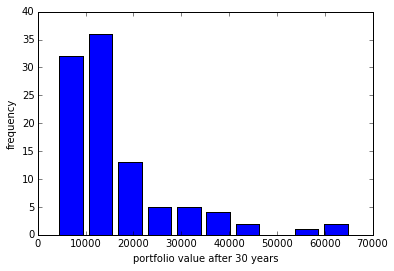

In [24]:
v30 = prod(1 + r_speriod30 , 1) * v0

hist, bins = histogram(v30)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.xlabel('portfolio value after 30 years')
plt.ylabel('frequency')
plt.show()

Simulated paths over time:

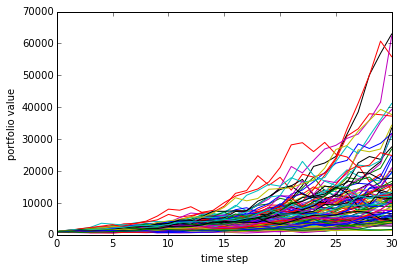

In [32]:
for scenario in r_speriod30:
    y = [prod(1 + scenario[0:i]) * v0 for i in range(0,31)]
    plt.plot(range(0,31), y)
plt.xlabel('time step')
plt.ylabel('portfolio value')
plt.show()

## Simulation Example 3
#### Download US Treasury bill data from Federal Reserve:

In [26]:
# Download 10-year T-bill rates from Federal Reserve
start_date_b = datetime.date(1977,1,1)
end_date_b = datetime.date(2015,1,1)
TBill_Ddata = web.DataReader('DGS10','fred',start_date_b,end_date_b)
TBill_Ddata.head()

,DGS10
DATE,
1977-01-03,6.84
1977-01-04,6.90
1977-01-05,6.88
1977-01-06,6.93
1977-01-07,7.07


#### Transform daily data into annual data:

In [22]:
# Create a time-series of annual data points from daily data
TBill_Adata = TBill_Ddata.resample('A',how='last')
TBill_Adata[['DGS10']].tail()

,DGS10
DATE,
2011-12-31,1.89
2012-12-31,1.78
2013-12-31,3.04
2014-12-31,2.17
2015-12-31,NaN


#### Compute annual return for bonds:

In [23]:
TBill_Adata['returns'] = TBill_Adata['DGS10'] / 100
TBill_Adata = TBill_Adata.dropna()
print TBill_Adata['returns']

DATE
1977-12-31    0.0778
1978-12-31    0.0915
1979-12-31    0.1033
1980-12-31    0.1243
1981-12-31    0.1398
1982-12-31    0.1036
1983-12-31    0.1182
1984-12-31    0.1155
1985-12-31    0.0900
1986-12-31    0.0723
1987-12-31    0.0883
1988-12-31    0.0914
1989-12-31    0.0793
1990-12-31    0.0808
1991-12-31    0.0671
1992-12-31    0.0670
1993-12-31    0.0583
1994-12-31    0.0784
1995-12-31    0.0558
1996-12-31    0.0643
1997-12-31    0.0575
1998-12-31    0.0465
1999-12-31    0.0645
2000-12-31    0.0512
2001-12-31    0.0507
2002-12-31    0.0383
2003-12-31    0.0427
2004-12-31    0.0424
2005-12-31    0.0439
2006-12-31    0.0471
2007-12-31    0.0404
2008-12-31    0.0225
2009-12-31    0.0385
2010-12-31    0.0330
2011-12-31    0.0189
2012-12-31    0.0178
2013-12-31    0.0304
2014-12-31    0.0217
Freq: A-DEC, Name: returns, dtype: float64


#### Compute average annual return and standard deviation of return for bonds:

In [24]:
TBill_mean_ret = float(TBill_Adata[['returns']].mean())
TBill_std_ret = float(TBill_Adata[['returns']].std())
print ("T-bill average return = %g%%, st. dev  = %g%%") % (100*TBill_mean_ret, 100*TBill_std_ret)

T-bill average return = 6.51316%, st. dev  = 3.11264%


#### Compute covariance matrix:

In [25]:
covMat = cov(array(SnP500_Adata[['returns']]),array(TBill_Adata[['returns']]),rowvar=0)
covMat

array([[ 0.02606826,  0.00033609],
       [ 0.00033609,  0.00096885]])

#### Simulate portfolio:

In [26]:
v0 = 1000 # Initial capital
Ns = 5000 # Number of scenarios

In [27]:
mu = [SnP500_mean_ret, TBill_mean_ret] # Expected return
mu

[0.09379053515133574, 0.06513157894736842]

In [28]:
stockRet = ones(Ns)
bondsRet = ones(Ns)

In [29]:
scenarios = random.multivariate_normal(mu, covMat, Ns)
for year in range(1, 31):
    scenarios = reshape(random.multivariate_normal(mu, covMat, Ns), (2, Ns))
    stockRet *= (1 + scenarios[0])
    bondsRet *= (1 + scenarios[1])

In [30]:
v30 = 0.5 * v0 * stockRet + 0.5 * v0 * bondsRet

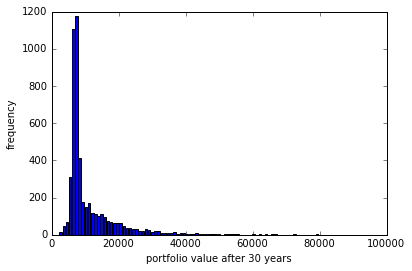

In [31]:
hist, bins = histogram(v30, bins = 100)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.xlabel('portfolio value after 30 years')
plt.ylabel('frequency')
plt.show()

# Simulation Example 4

Compare two portfolios

In [32]:
# Compute portfolios by iterating through different combinations of weights
v30comp = []
for w in arange(0.2, 1.01, 0.2):
    v30comp += [w * v0 * stockRet + (1 - w) * v0 * bondsRet]

In [33]:
# Plot a histogram of the distribution of
# differences in outcomes for v30
# (Stratery 4 - Strategy 2)
v30d = v30comp[3] - v30comp[1]

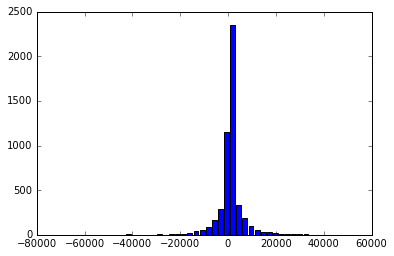

In [34]:
hist, bins = histogram(v30d, bins = 50)
positions = (bins[:-1] + bins[1:]) / 2
width = (bins[1] - bins[0]) * 0.8
plt.bar(positions, hist, width=width)
plt.show()

In [35]:
# Compute number of elements in v30d that are > 0 and < 0 and compare
pos_count = (v30d > 0).sum()
neg_count = (v30d <= 0).sum()

print u"""Strategy 1 was better in %d cases; 
Strategy 2 was better in %d cases. 
Difference = %d""" % (pos_count, neg_count, pos_count - neg_count)

Strategy 1 was better in 2498 cases; 
Strategy 2 was better in 2502 cases. 
Difference = -4
